# How to use the sequence of point cloud (seqpc) library

In [1]:
import open3d as o3d
import numpy as np
import pandas as pd
#import functions as f
import matplotlib.pyplot as plt
#from scipy.interpolate import interp1d
import seqpc

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## Import the dataset

In [2]:
facemocap_df = pd.read_pickle('facemocap_df.pkl')
facemocap_df.sample(10)

,File name,Original SPC,Name,Experimentator,MoCap platform,Pathology,Repetitive,Movement,Date
0,P2_D1_M3x10e10.csv,"[[-0.099221, 254.672, 659.841, 0.899608, 235.8...",NaN,Mattieu,UTC,Facial palsy,False,3,NaN
204,M3.csv,"[[373.016, 9.43395, 1250.69, 366.363, -7.1488,...",LN01,François-Régis,UTC,False,False,3,11-06-2014
135,TP01_P7.csv,"[[-105.789, 440.456, 1285.27, -106.652, 459.35...",TP01,François-Régis,UTC,False,False,,12-05-2015
162,FRS02_M4.csv,"[[483.308, -55.5361, 1184.22, 489.925, -45.105...",FRS02,François-Régis,UTC,False,False,4,11-06-2014
218,CN01_M5.csv,"[[-173.882, 611.09, 645.027, -165.776, 589.379...",CN01,François-Régis,UTC,False,False,5,13-05-2014
198,RL01_M1.csv,"[[284.184, -125.726, 1099.95, 284.56, -138.395...",RL01,François-Régis,UTC,False,False,1,11-06-2014
226,P2_D1_M4e1bis.csv,"[[-0.357171, 236.971, 639.328, 4.35066, 219.16...",NaN,Mattieu,UTC,Facial palsy,False,4,NaN
479,P09_D01_M3x10_e7.csv,"[[2.7755, 219.763, 648.54, -1.81306, 204.577, ...",NaN,Mattieu,UTC,Facial palsy,False,3,NaN
294,M3_05.csv,"[[211.428, 71.3236, 1130.58, 187.252, 74.9748,...",AF,Félix,IFF,False,False,3,NaN
15,P09_D01_M5x10_e1.csv,"[[-7.86203, 227.404, 636.018, -11.8578, 212.14...",NaN,Mattieu,UTC,Facial palsy,False,5,NaN


## Define the variables to select a sequence of point cloud
Note: Notice that some transformations are available.

In [3]:
file_name = 'JB01_M5.csv'
Original_SPC = 'Original SPC'
scaled=False, 
interpolated=False
dental_support_frame=False
target_length=100
t = 50

In [4]:
spc, spc_array = seqpc.get_spc_from_df(facemocap_df, file_name, scaled=True, interpolated=True)

Dental support was removed


c:\Users\ederro\Documents\GitHub\test_3d\seqpc.py:36: RuntimeWarning: All-NaN slice encountered
  spc_array = spc_array - np.nanmin(np.nanmin(spc_array, axis=0), axis=0)
c:\Users\ederro\Documents\GitHub\test_3d\seqpc.py:37: RuntimeWarning: All-NaN slice encountered
  spc_array = spc_array / np.nanmax(np.nanmax(spc_array, axis=0), axis=0)


## Use spc to visualize a target point cloud with the library open3D

In [17]:
o3d.visualization.draw_geometries([spc[t]])

[Open3D INFO]   -- Mouse view control --
[Open3D INFO]     Left button + drag         : Rotate.
[Open3D INFO]     Ctrl + left button + drag  : Translate.
[Open3D INFO]     Wheel button + drag        : Translate.
[Open3D INFO]     Shift + left button + drag : Roll.
[Open3D INFO]     Wheel                      : Zoom in/out.
[Open3D INFO] 
[Open3D INFO]   -- Keyboard view control --
[Open3D INFO]     [/]          : Increase/decrease field of view.
[Open3D INFO]     R            : Reset view point.
[Open3D INFO]     Ctrl/Cmd + C : Copy current view status into the clipboard.
[Open3D INFO]     Ctrl/Cmd + V : Paste view status from clipboard.
[Open3D INFO] 
[Open3D INFO]   -- General control --
[Open3D INFO]     Q, Esc       : Exit window.
[Open3D INFO]     H            : Print help message.
[Open3D INFO]     P, PrtScn    : Take a screen capture.
[Open3D INFO]     D            : Take a depth capture.
[Open3D INFO]     O            : Take a capture of current rendering settings.
[Open3D INFO

## Use spc_array to visualize a target point cloud with the library matplotlib

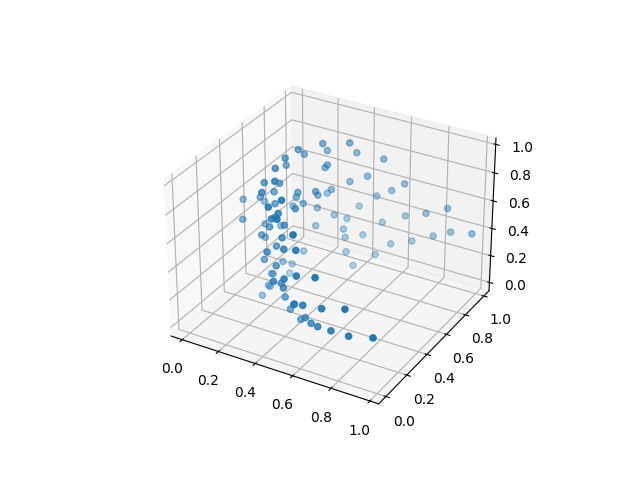

In [6]:
%matplotlib widget

pc = spc_array[t]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pc[:, 0], pc[:, 1], pc[:, 2])
plt.show()

## Export as PLY

In [7]:
# Export the point cloud (pc) to a .ply file
o3d.io.write_point_cloud("pc.ply", o3d.geometry.PointCloud(o3d.utility.Vector3dVector(pc)))

True

## Load the PLY

In [11]:
# Load the point cloud from the .ply file
pc1 = o3d.io.read_point_cloud("pc.ply")
pts = np.asarray(pc1.points[3:]) # export the first 3 points (nans) which correspond to the dental support frame
pc1.points = o3d.utility.Vector3dVector(pts)
o3d.visualization.draw_geometries([pc1])

## Add csvs
Although, there is not a "universal" template for adding csv to the dataset, you can modify the following code if required.

In [ ]:
import os
# Find the folders in root = C:\Users\ederro\Documents\other_px
root = 'C:\\Users\\ederro\\Documents\\other_px\\'
folders = os.listdir(root)
df = pd.DataFrame()
error_list = []

for folder in folders:
    files = os.listdir(root + folder)
    for file in files:
        path = root + folder + "\\" + file
        try:
            csv_content = pd.read_csv(path, header=None, skiprows=5, usecols=[i+2 for i in range(324)])
            csv_array = csv_content.to_numpy()
        except:
            print("Error: " + path)
            error_list.append(path)
        df = pd.concat([df, pd.DataFrame({'File name': file, 'Original SPC': [csv_array], 
                                                      "Name": folder, "Experimentator": "Félix", 
                                                      'MoCap platform': "IFF", "Pathology": True,
                                                      "Repetitive": False, "Movement": "", "Date": ""})], 
                                                      ignore_index=True)      

In [ ]:
facemocap_df = pd.concat([facemocap_df, df], axis=0)
facemocap_df.to_pickle("facemocap_df.pkl")